In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import igraph as ig

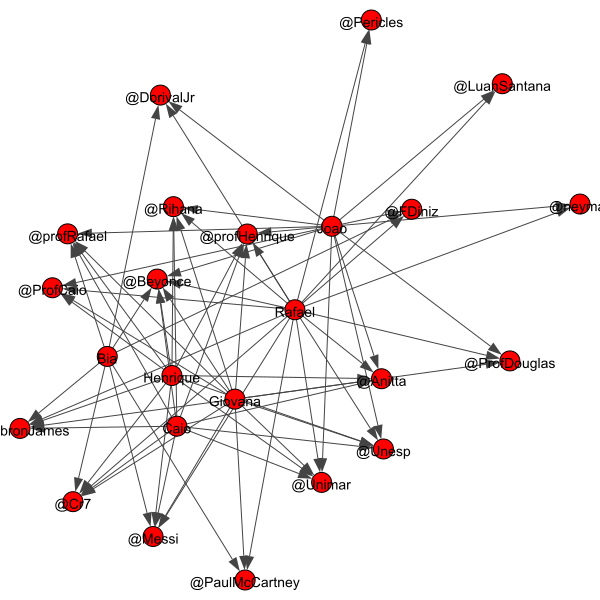

In [2]:
#Incidência/Criando a Matriz principal-"corpus.txt"
corpus = pd.read_csv('./corpus.txt',delimiter='\t',header=None)
names = ['Rafael', 'Joao', 'Bia','Giovana','Caio','Henrique']
arrobas=['@neymar','@LuanSantana','@Pericles','@ProfCaio','@ProfDouglas','@profHenrique','@Unimar','@Unesp','@Anitta','@Rihana','@Beyonce','@DorivalJr','@FDiniz','@Cr7','@Messi','@LebronJames','@PaulMcCartney','@profRafael']

corpdf = pd.DataFrame(0, index=arrobas, columns=names)

#Adiciona 1 a matriz quando o arroba estiver presente
for col, name in enumerate(names):
    for arroba in arrobas:
        if arroba in corpus[col].values:
            corpdf.at[arroba, name] = 1


#print(corpdf)

graph_inc_corpus = nx.DiGraph()

graph_inc_corpus.add_nodes_from(arrobas)
graph_inc_corpus.add_nodes_from(names)


#Adiciona as Arestas quando a matriz tiver 1
for arroba in arrobas:
    for name in names:
        if corpdf.at[arroba, name] == 1:
            graph_inc_corpus.add_edge(name, arroba)


Graph_Inc=ig.Graph.from_networkx(graph_inc_corpus)
ig.plot(Graph_Inc,vertex_label=graph_inc_corpus)



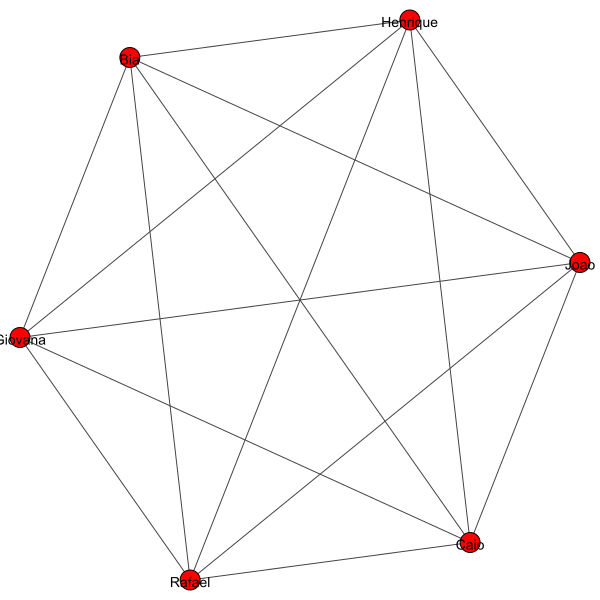

In [3]:
#Similaridade-"corpus.txt"
#print(corpdf)
corpdf_T=corpdf.transpose()
#print(corpdf_T)

c_sim=corpdf_T.dot(corpdf)

graph_sim_corpus = nx.Graph(c_sim)

pos= nx.spring_layout(graph_sim_corpus, k=2.2)
graph_sim_corpus.remove_edges_from(nx.selfloop_edges(graph_sim_corpus))

Graph_Sim=ig.Graph.from_networkx(graph_sim_corpus)
ig.plot(Graph_Sim,vertex_label=graph_sim_corpus)




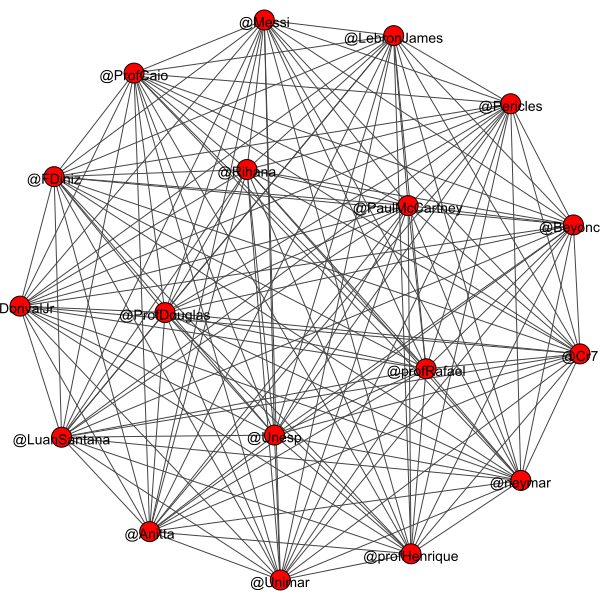

In [4]:
#Coocorrência-"corpus.txt"
#print(corpdf)
corpdf_T=corpdf.transpose()
#print(corpdf_T)

c_sim=corpdf.dot(corpdf_T)

graph_coo_corpus = nx.Graph(c_sim)

pos= nx.spring_layout(graph_coo_corpus, k=9)
graph_coo_corpus.remove_edges_from(nx.selfloop_edges(graph_coo_corpus))

Graph_coo=ig.Graph.from_networkx(graph_coo_corpus)
ig.plot(Graph_coo,vertex_label=graph_coo_corpus)


